### Percentage of Foreign Born Population in Metro L Line Chinatown Station Walkshed

For this notebook, I plan on creating an chloropeth map of the Chinatown Station showing the percent Foreign Born population within the station walkshed. 

In [93]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

In [91]:
address = 'Chinatown Station, College Street, New Chinatown, Chinatown, Los Angeles, Los Angeles County, California, 90012, United States'
network_type = 'walk'
trip_times = [10] #in minutes
meters_per_minute = 80 # travel distance per minute

In [96]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
G = ox.graph_from_address(address, network_type=network_type, dist = 1500)

CPU times: user 4.79 s, sys: 72.6 ms, total: 4.86 s
Wall time: 13.6 s


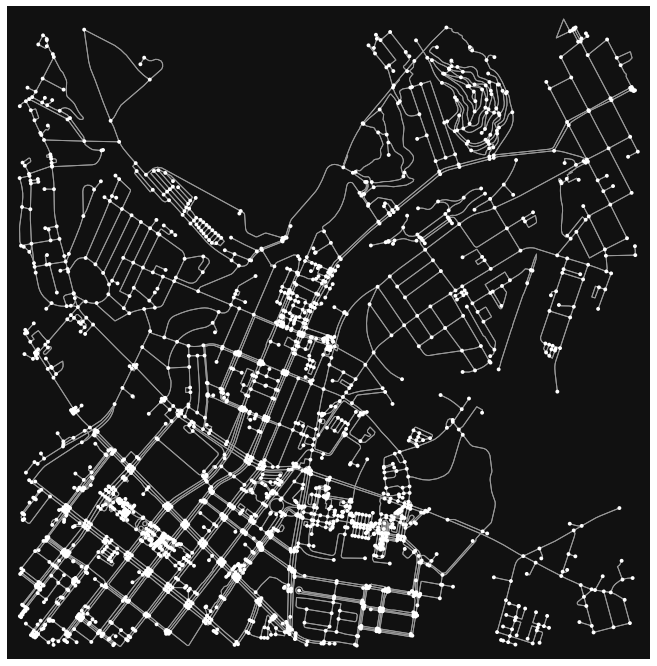

In [97]:
fig, ax = ox.plot_graph(G,figsize=(12,12))

In [98]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [99]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [100]:
gdf_nodes.head()

y             x  street_count         lon        lat  \
osmid                                                                         
15027548    4.039027e+06 -1.316061e+07             3 -118.223785  34.076114   
67619407    4.039118e+06 -1.316050e+07             4 -118.222746  34.076796   
123283621   4.038908e+06 -1.316055e+07             3 -118.223245  34.075226   
15027549    4.038710e+06 -1.316045e+07             4 -118.222311  34.073758   
3723806094  4.038716e+06 -1.316045e+07             4 -118.222338  34.073802   

                    highway                           geometry  
osmid                                                           
15027548                NaN  POINT (-13160611.557 4039026.875)  
67619407    traffic_signals  POINT (-13160495.907 4039118.493)  
123283621               NaN  POINT (-13160551.456 4038907.559)  
15027549    traffic_signals  POINT (-13160447.416 4038710.296)  
3723806094              NaN  POINT (-13160450.467 4038716.075)

### Plotting the station area

<AxesSubplot:>

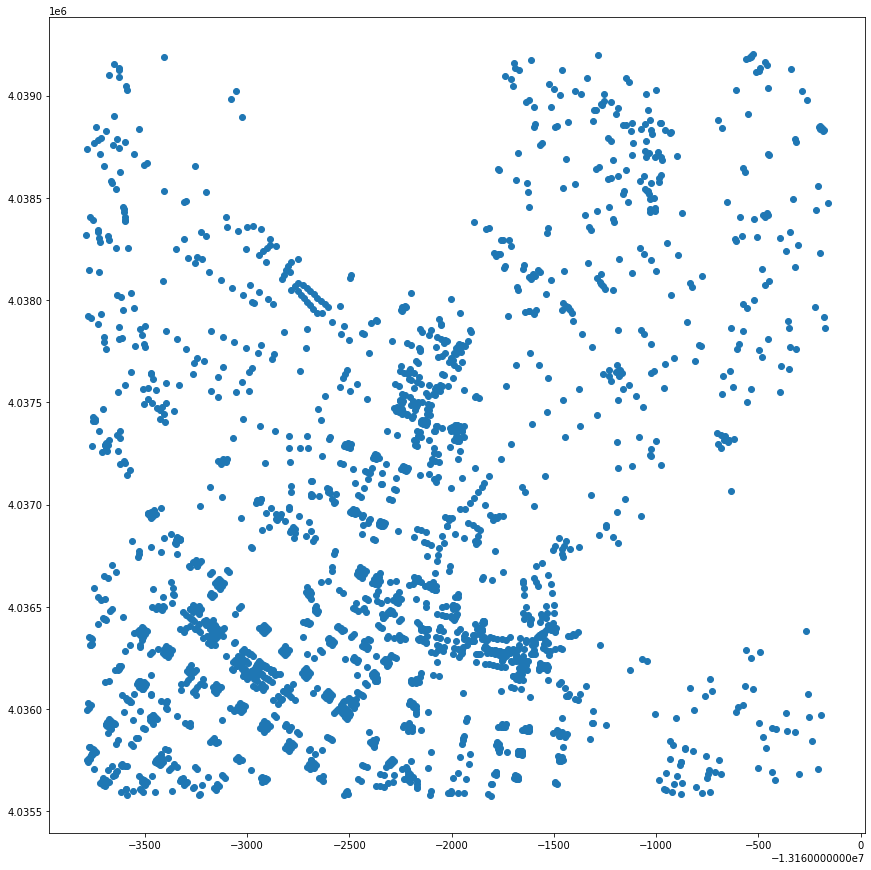

In [101]:
gdf_nodes.plot(figsize=(15,15))

In [102]:
gdf_edges.head()

osmid               name    highway  oneway  \
u        v          key                                                    
15027548 67619407   0      9126419    Humboldt Street   tertiary   False   
         123283621  0    358037415          Avenue 19   tertiary   False   
67619407 7871476832 0      9126419    Humboldt Street   tertiary   False   
         6787624912 0    398398790  San Fernando Road  secondary   False   
         15027548   0      9126419    Humboldt Street   tertiary   False   

                          length  \
u        v          key            
15027548 67619407   0    122.072   
         123283621  0    110.537   
67619407 7871476832 0     41.864   
         6787624912 0     67.319   
         15027548   0    122.072   

                                                                  geometry  \
u        v          key                                                      
15027548 67619407   0    LINESTRING (-13160611.557 4039026.875, -131605...   
         123283621  0    LINESTRING (-13160611.557 4039026.875, -131606...   
67619407 7871476832 0    LINESTRING (-13160495.907 4039118.493, -131604...   
         6787624912 0    LINESTRING (-13160495.907 4039118.493, -131605...   
         15027548   0    LINESTRING (-13160495.907 4039118.493, -131605...   

                        lanes maxspeed bridge service access tunnel width  
u        v          key                                                    
15027548 67619407   0     NaN      NaN    NaN     NaN    NaN    NaN   NaN  
         123283621  0       2      NaN    NaN     NaN    NaN    NaN   NaN  
67619407 7871476832 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN  
         6787624912 0       4      NaN    NaN     NaN    NaN    NaN   NaN  
         15027548   0     NaN      NaN    NaN     NaN    NaN    NaN   NaN

<AxesSubplot:>

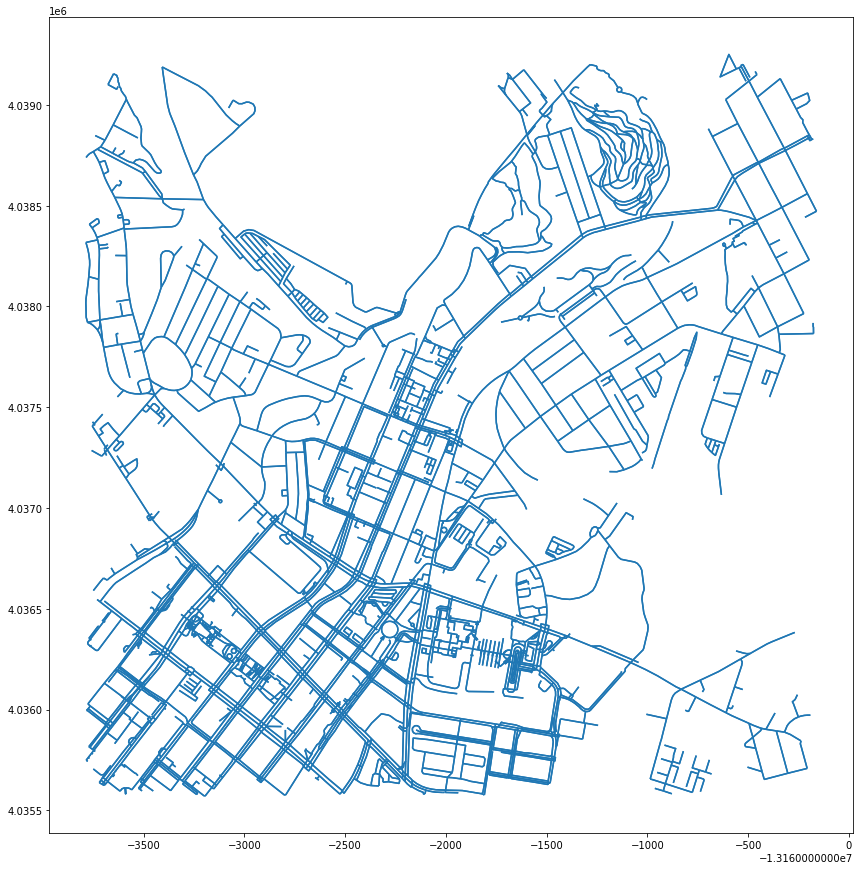

In [103]:
gdf_edges.plot(figsize=(15,15))

KeyError: 'Chinatown Station, College Street, New Chinatown, Chinatown, Los Angeles, Los Angeles County, California, 90012, United States'

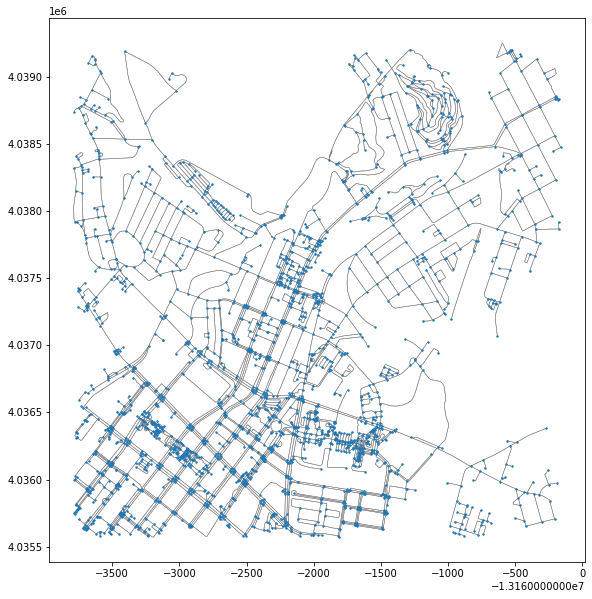

In [104]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[address].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

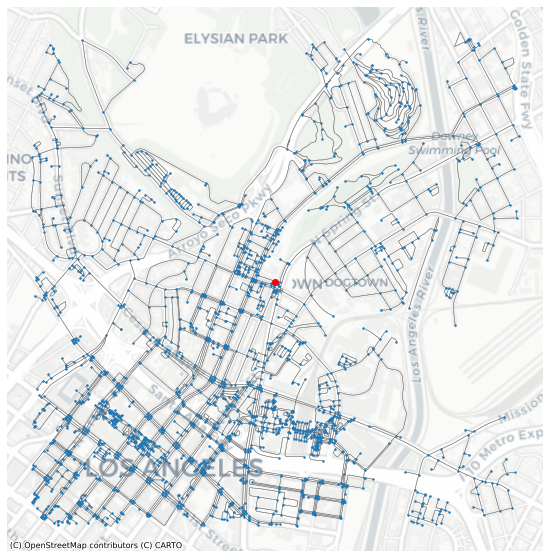

In [115]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[8290553634]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [106]:
gdf_edges.sample(5)

osmid               name  \
u          v          key                                                
6883792553 6883792552 0                   735012008                NaN   
9466976721 9466976724 0    [1026817280, 1026817282]                NaN   
4466862372 3898644911 0                   161929506  North Hope Street   
6699521860 2889717987 0                   285298339                NaN   
7882430713 4474877943 0                   450570666                NaN   

                             highway  oneway   length  \
u          v          key                               
6883792553 6883792552 0      footway   False   44.800   
9466976721 9466976724 0      footway   False   33.590   
4466862372 3898644911 0    secondary   False  105.320   
6699521860 2889717987 0      footway   False    3.866   
7882430713 4474877943 0      service   False   40.706   

                                                                    geometry  \
u          v          key                                                      
6883792553 6883792552 0    LINESTRING (-13162184.579 4037641.792, -131621...   
9466976721 9466976724 0    LINESTRING (-13161776.894 4036931.778, -131617...   
4466862372 3898644911 0    LINESTRING (-13163497.559 4036388.756, -131634...   
6699521860 2889717987 0    LINESTRING (-13163685.389 4035917.884, -131636...   
7882430713 4474877943 0    LINESTRING (-13161002.010 4037311.545, -131610...   

                          lanes maxspeed bridge service access tunnel width  
u          v          key                                                    
6883792553 6883792552 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN  
9466976721 9466976724 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN  
4466862372 3898644911 0       2      NaN    NaN     NaN    NaN    NaN   NaN  
6699521860 2889717987 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN  
7882430713 4474877943 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN

In [107]:
gdf_edges['walk_time'] = (gdf_edges['length']/meters_per_minute)

In [114]:
gdf_edges.sample(5)

osmid               name  \
u          v          key                                              
2889717984 6699521857 0                 285298338                NaN   
8881631532 8881631541 0                 959940678                NaN   
6471392418 6910733879 0                 689797031                NaN   
8873638107 3898644442 0                 958988193                NaN   
6474121891 6477101789 0    [405168266, 358727540]  South Hill Street   

                             highway  oneway   length  \
u          v          key                               
2889717984 6699521857 0      footway   False    9.113   
8881631532 8881631541 0      footway   False  123.762   
6471392418 6910733879 0      footway   False   28.645   
8873638107 3898644442 0      footway   False   45.564   
6474121891 6477101789 0    secondary   False  128.446   

                                                                    geometry  \
u          v          key                                                      
2889717984 6699521857 0    LINESTRING (-13163675.092 4035949.109, -131636...   
8881631532 8881631541 0    LINESTRING (-13162437.742 4035725.658, -131624...   
6471392418 6910733879 0    LINESTRING (-13162935.184 4036178.101, -131629...   
8873638107 3898644442 0    LINESTRING (-13163016.993 4036294.943, -131630...   
6474121891 6477101789 0    LINESTRING (-13163289.759 4035922.667, -131633...   

                          lanes maxspeed bridge service access tunnel width  \
u          v          key                                                     
2889717984 6699521857 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN   
8881631532 8881631541 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN   
6471392418 6910733879 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN   
8873638107 3898644442 0     NaN      NaN    NaN     NaN    NaN    NaN   NaN   
6474121891 6477101789 0       5      NaN    NaN     NaN    NaN    NaN   NaN   

                           walk_time  
u          v          key             
2889717984 6699521857 0     0.113912  
8881631532 8881631541 0     1.547025  
6471392418 6910733879 0     0.358063  
8873638107 3898644442 0     0.569550  
6474121891 6477101789 0     1.605575

In [109]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[10]
['#0d0887']


In [110]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(10, '#0d0887')]

In [117]:
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, 8290553634, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 173 nodes within 10 minutes 


In [118]:
gdf_nodes.sample(30)

y             x  street_count         lon        lat  \
osmid                                                                         
9057071148  4.036349e+06 -1.316232e+07             4 -118.239100  34.056189   
4868995629  4.035906e+06 -1.316351e+07             4 -118.249795  34.052886   
605023373   4.035750e+06 -1.316069e+07             1 -118.224514  34.051730   
26468584    4.038869e+06 -1.316143e+07             3 -118.231160  34.074942   
6731343123  4.037866e+06 -1.316018e+07             3 -118.219871  34.067474   
8657339873  4.036315e+06 -1.316376e+07             4 -118.252106  34.055931   
7882430717  4.037564e+06 -1.316116e+07             1 -118.228742  34.065228   
6471392408  4.036264e+06 -1.316282e+07             4 -118.243586  34.055552   
3215839084  4.035631e+06 -1.316369e+07             4 -118.251420  34.050845   
6471392405  4.036149e+06 -1.316290e+07             3 -118.244344  34.054700   
60945762    4.037713e+06 -1.316288e+07             4 -118.244165  34.066337   
5322488444  4.037587e+06 -1.316211e+07             3 -118.237255  34.065398   
6474121666  4.035614e+06 -1.316316e+07             4 -118.246691  34.050714   
7087041281  4.038252e+06 -1.316358e+07             3 -118.250494  34.070351   
9055182282  4.037223e+06 -1.316310e+07             1 -118.246140  34.062689   
9033099290  4.037261e+06 -1.316368e+07             1 -118.251384  34.062972   
9074390822  4.035793e+06 -1.316166e+07             4 -118.233227  34.052045   
8881631460  4.036496e+06 -1.316248e+07             3 -118.240608  34.057278   
8873888144  4.036786e+06 -1.316298e+07             4 -118.245025  34.059436   
9464527591  4.035889e+06 -1.316146e+07             4 -118.231412  34.052764   
8873450929  4.036488e+06 -1.316345e+07             3 -118.249247  34.057221   
7863775128  4.037358e+06 -1.316362e+07             3 -118.250808  34.063696   
5547192141  4.037101e+06 -1.316234e+07             1 -118.239322  34.061785   
7672084058  4.035966e+06 -1.316250e+07             4 -118.240772  34.053333   
807592259   4.037065e+06 -1.316063e+07             1 -118.223976  34.061517   
683066996   4.037592e+06 -1.316228e+07             1 -118.238740  34.065434   
250052551   4.035959e+06 -1.316146e+07             3 -118.231426  34.053281   
8873888159  4.036349e+06 -1.316260e+07             4 -118.241636  34.056183   
2282162072  4.035806e+06 -1.316269e+07             1 -118.242471  34.052142   
4409000703  4.036293e+06 -1.316182e+07             3 -118.234679  34.055773   

             highway                           geometry     time    color  
osmid                                                                      
9057071148  crossing  POINT (-13162316.404 4036349.334)      NaN      NaN  
4868995629       NaN  POINT (-13163506.988 4035905.577)      NaN      NaN  
605023373        NaN  POINT (-13160692.642 4035750.245)      NaN      NaN  
26468584         NaN  POINT (-13161432.483 4038869.283)      NaN      NaN  
6731343123       NaN  POINT (-13160175.797 4037865.725)      NaN      NaN  
8657339873       NaN  POINT (-13163764.236 4036314.735)      NaN      NaN  
7882430717       NaN  POINT (-13161163.368 4037563.866)      NaN      NaN  
6471392408       NaN  POINT (-13162815.772 4036263.690)      NaN      NaN  
3215839084  crossing  POINT (-13163687.860 4035631.286)      NaN      NaN  
6471392405       NaN  POINT (-13162900.219 4036149.240)      NaN      NaN  
60945762         NaN  POINT (-13162880.193 4037712.987)      NaN      NaN  
5322488444       NaN  POINT (-13162110.986 4037586.777)  10 mins  #0d0887  
6474121666  crossing  POINT (-13163161.475 4035613.685)      NaN      NaN  
7087041281       NaN  POINT (-13163584.734 4038252.363)      NaN      NaN  
9055182282  crossing  POINT (-13163100.149 4037222.790)      NaN      NaN  
9033099290  crossing  POINT (-13163683.841 4037260.805)      NaN      NaN  
9074390822  crossing  POINT (-13161662.680 4035792.568)      NaN      NaN  
8881631460       NaN  POINT (-13162484.318 4036495

In [119]:
gdf_nodes['color'].fillna('#cccccc', inplace=True)

In [120]:
gdf_nodes.sample(5)

y             x  street_count         lon        lat  \
osmid                                                                         
268652289   4.037337e+06 -1.316271e+07             3 -118.242622  34.063538   
3637840463  4.037983e+06 -1.316287e+07             1 -118.244102  34.068348   
8460083432  4.038212e+06 -1.316324e+07             3 -118.247440  34.070053   
2178255367  4.036066e+06 -1.316262e+07             4 -118.241853  34.054080   
9033018396  4.035636e+06 -1.316149e+07             4 -118.231698  34.050880   

             highway                           geometry time    color  
osmid                                                                  
268652289        NaN  POINT (-13162708.516 4037336.821)  NaN  #cccccc  
3637840463       NaN  POINT (-13162873.179 4037983.135)  NaN  #cccccc  
8460083432       NaN  POINT (-13163244.786 4038212.248)  NaN  #cccccc  
2178255367       NaN  POINT (-13162622.900 4036066.030)  NaN  #cccccc  
9033018396  crossing  POINT (-13161492.406 4035636.082)  NaN  #cccccc

<AxesSubplot:>

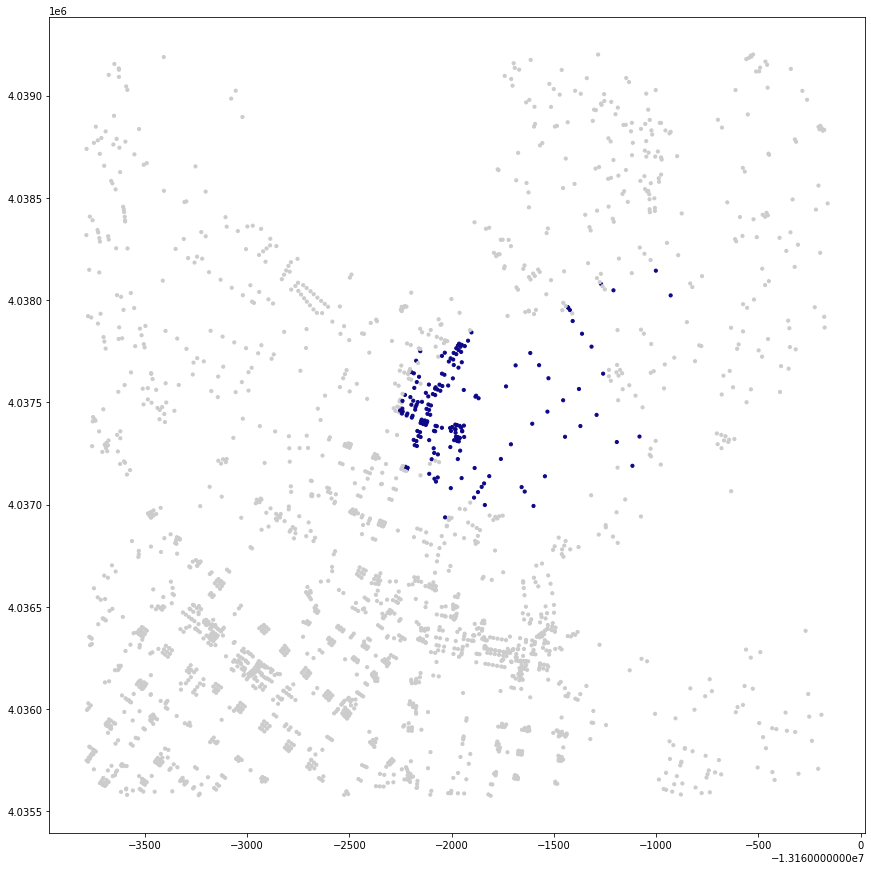

In [123]:
gdf_nodes.plot(figsize=(15,15),
               color=gdf_nodes['color'],
               markersize=10)

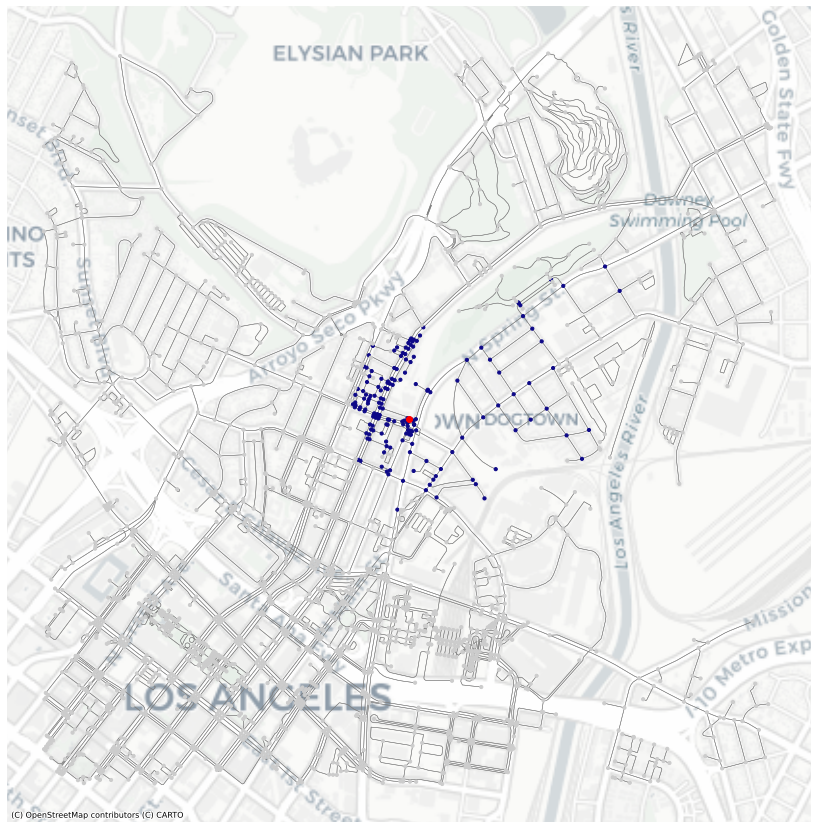

In [132]:
# a "full" map
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(15,15))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax,
               color=gdf_nodes['color'],
               markersize=10, 
               zorder=20)

# marking the station site with a red dot. Grabbed the station's node from OpenStreet Maps
gdf_nodes.loc[[8290553634]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [133]:
gdf_nodes[gdf_nodes['time']=='10 mins']

y             x  street_count         lon        lat  \
osmid                                                                         
15717265    4.038144e+06 -1.316100e+07             4 -118.227285  34.069542   
122656713   4.038023e+06 -1.316093e+07             4 -118.226635  34.068642   
123037729   4.038048e+06 -1.316121e+07             4 -118.229147  34.068827   
17677673    4.037351e+06 -1.316198e+07             3 -118.236082  34.063645   
67619377    4.037281e+06 -1.316201e+07             3 -118.236313  34.063122   
...                  ...           ...           ...         ...        ...   
8409454505  4.037529e+06 -1.316211e+07             1 -118.237282  34.064967   
8409457169  4.037488e+06 -1.316217e+07             3 -118.237797  34.064661   
8409457171  4.037477e+06 -1.316218e+07             1 -118.237841  34.064580   
8409457170  4.037501e+06 -1.316217e+07             1 -118.237745  34.064762   
8409457198  4.037742e+06 -1.316203e+07             1 -118.236556  34.066557   

                    highway                           geometry     time  \
osmid                                                                     
15717265    traffic_signals  POINT (-13161001.164 4038143.644)  10 mins   
122656713               NaN  POINT (-13160928.751 4038022.752)  10 mins   
123037729               NaN  POINT (-13161208.430 4038047.599)  10 mins   
17677673                NaN  POINT (-13161980.397 4037351.213)  10 mins   
67619377                NaN  POINT (-13162006.145 4037280.975)  10 mins   
...                     ...                                ...      ...   
8409454505              NaN  POINT (-13162114.070 4037528.873)  10 mins   
8409457169              NaN  POINT (-13162171.299 4037487.673)  10 mins   
8409457171              NaN  POINT (-13162176.286 4037476.802)  10 mins   
8409457170              NaN  POINT (-13162165.510 4037501.245)  10 mins   
8409457198              NaN  POINT (-13162033.240 4037742.483)  10 mins   

              color  
osmid                
15717265    #0d0887  
122656713   #0d0887  
123037729   #0d0887  
17677673    #0d0887  
67619377    #0d0887  
...             ...  
8409454505  #0d0887  
8409457169  #0d0887  
8409457171  #0d0887  
8409457170  #0d0887  
8409457198  #0d0887  

[173 rows x 9 columns]

In [135]:
gdf_10 = gdf_nodes[gdf_nodes['time']=='10 mins']

<AxesSubplot:>

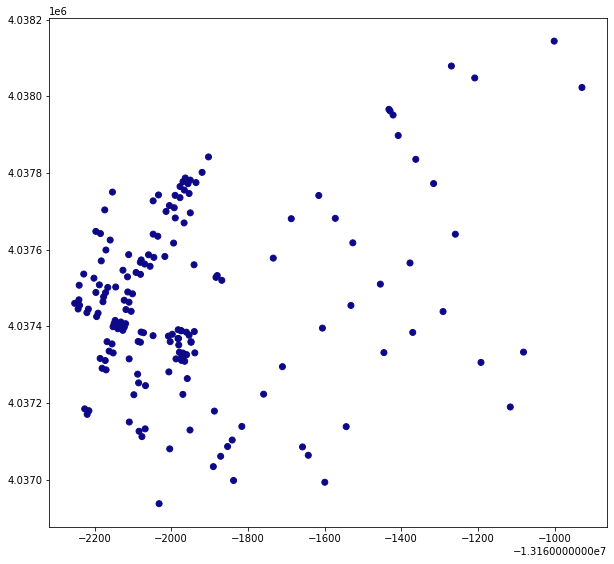

In [136]:
gdf_10.plot(figsize=(10,10),color=gdf_10.color)

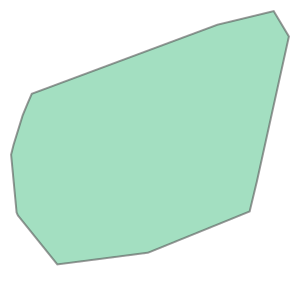

In [137]:
gdf_10.unary_union.convex_hull

In [138]:
isochrones = gdf_nodes.dissolve("time")
isochrones

geometry             y  \
time                                                                       
10 mins  MULTIPOINT (-13162251.772 4037459.803, -131622...  4.038144e+06   

                    x  street_count         lon        lat          highway  \
time                                                                          
10 mins -1.316100e+07             4 -118.227285  34.069542  traffic_signals   

           color  
time              
10 mins  #0d0887

In [139]:
isochrones = isochrones.convex_hull.reset_index()
isochrones

time                                                  0
0  10 mins  POLYGON ((-13162031.671 4036937.288, -13162219...

In [140]:
isochrones.columns=['time','geometry']
isochrones

time                                           geometry
0  10 mins  POLYGON ((-13162031.671 4036937.288, -13162219...

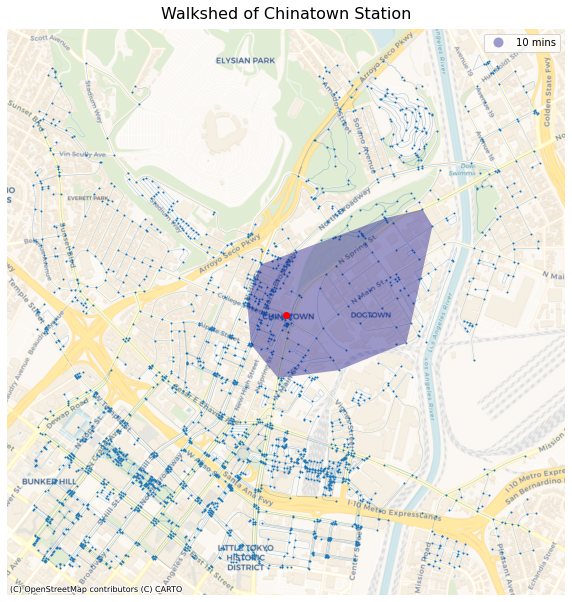

In [141]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,20))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[8290553634]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walkshed of Chinatown Station',fontsize=16,pad=10)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

In [3]:
gdf = gpd.read_file('acs2019_5yr_B05015_14000US06037222001.geojson')

In [4]:
gdft = gpd.read_file('acs2019_5yr_B01003_14000US06037222001.geojson')

In [5]:
df = pd.merge(gdf, gdft)

In [6]:
df

geoid                                   name  B05015001  \
0           05000US06037                 Los Angeles County, CA  3430507.0   
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1424.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA      810.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     3167.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1749.0   
...                  ...                                    ...        ...   
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA      146.0   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA        0.0   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA        0.0   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA        0.0   

      B05015001, Error  B05015002  B05015002, Error  B05015003  \
0              14119.0   288054.0            4584.0    76162.0   
1                326.0       13.0              25.0        0.0   
2                180.0        0.0              12.0        0.0   
3                438.0        0.0              17.0        0.0   
4                251.0        0.0              12.0        0.0   
...                ...        ...               ...        ...   
2342              71.0        0.0              12.0        0.0   
2343              12.0        0.0              12.0        0.0   
2344              12.0        0.0              12.0        0.0   
2345              12.0        0.0              12.0        0.0   
2346              12.0        0.0              12.0        0.0   

      B05015003, Error  B05015004  B05015004, Error  ...  B05015028, Error  \
0               2634.0   211892.0            3307.0  ...            2277.0   
1                 12.0       13.0              25.0  ...              12.0   
2                 12.0        0.0              12.0  ...              12.0   
3                 17.0        0.0              17.0  ...              17.0   
4                 12.0        0.0              12.0  ...              12.0   
...                ...        ...               ...  ...               ...   
2342              12.0        0.0              12.0  ...              12.0   
2343              12.0        0.0              12.0  ...              12.0   
2344              12.0        0.0              12.0  ...              12.0   
2345              12.0        0.0              12.0  ...              12.0   
2346              12.0        0.0              12.0  ...              12.0   

      B05015029  B05015029, Error  B05015030  B05015030, Error  B05015031  \
0      989775.0            8062.0   173834.0            3797.0   815941.0   
1         910.0             256.0      130.0              79.0      780.0   
2         690.0             149.0       36.0              36.0      654.0   
3        2054.0             299.0      198.0             182.0     1856.0   
4        1120.0             252.0      147.0             118.0      973.0   
...         ...               ...        ...               ...        ...   
2342       37.0              23.0        0.0              12.0       37.0   
2343        0.0              12.0        0.0              12.0        0.0   
2344        0.0              12.0        0.0              12.0        0.0   
2345        0.0              12.0        0.0              12.0        0.0   
2346        0.0              12.0        0.0              12.0        0.0   

      B05015031, Error                                           geometry  \
0               6993.0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...   
1                249.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...   
2                140.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...   
3                279.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...   
4                226.0  MULTIPOLYGON (((-1

<AxesSubplot:>

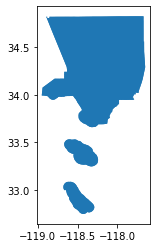

In [37]:
df.plot()

In [38]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      2347 non-null   object  
 1   name       2347 non-null   object  
 2   B05015001  2347 non-null   float64 
 3   B05015002  2347 non-null   float64 
 4   B05015003  2347 non-null   float64 
 5   B05015004  2347 non-null   float64 
 6   B05015005  2347 non-null   float64 
 7   B05015006  2347 non-null   float64 
 8   B05015007  2347 non-null   float64 
 9   B05015008  2347 non-null   float64 
 10  B05015009  2347 non-null   float64 
 11  B05015010  2347 non-null   float64 
 12  B05015011  2347 non-null   float64 
 13  B05015012  2347 non-null   float64 
 14  B05015013  2347 non-null   float64 
 15  B05015014  2347 non-null   float64 
 16  B05015015  2347 non-null   float64 
 17  B05015016  2347 non-null   float64 
 18  B05015017  2347 non-null   float64 
 19  B05015018  2347 non

We have lots of columns right now! Most we want to keep, but note the columns that say "Error" in them. These are our margin of error stats. We don't really need this. I'm going to drop these from our data. 

In [39]:
df.drop(columns=['B05015001, Error', 
                 'B05015002, Error', 
                 'B05015003, Error', 
                 'B05015004, Error', 
                 'B05015005, Error', 
                 'B05015006, Error', 
                 'B05015007, Error', 
                 'B05015008, Error', 
                 'B05015009, Error', 
                 'B05015010, Error', 
                 'B05015011, Error',
                 'B05015012, Error', 
                 'B05015013, Error', 
                 'B05015014, Error',
                 'B05015015, Error',
                 'B05015016, Error',
                 'B05015017, Error',
                 'B05015018, Error',
                 'B05015019, Error',
                 'B05015020, Error',
                 'B05015021, Error',
                 'B05015022, Error',
                 'B05015023, Error',
                 'B05015024, Error',
                 'B05015025, Error',
                 'B05015026, Error',
                 'B05015027, Error',
                 'B05015028, Error',
                 'B05015029, Error',
                 'B05015030, Error',
                 'B05015031, Error',
                 'B01003001, Error'])


KeyError: "['B05015001, Error' 'B05015002, Error' 'B05015003, Error'\n 'B05015004, Error' 'B05015005, Error' 'B05015006, Error'\n 'B05015007, Error' 'B05015008, Error' 'B05015009, Error'\n 'B05015010, Error' 'B05015011, Error' 'B05015012, Error'\n 'B05015013, Error' 'B05015014, Error' 'B05015015, Error'\n 'B05015016, Error' 'B05015017, Error' 'B05015018, Error'\n 'B05015019, Error' 'B05015020, Error' 'B05015021, Error'\n 'B05015022, Error' 'B05015023, Error' 'B05015024, Error'\n 'B05015025, Error' 'B05015026, Error' 'B05015027, Error'\n 'B05015028, Error' 'B05015029, Error' 'B05015030, Error'\n 'B05015031, Error' 'B01003001, Error'] not found in axis"

Let's make sure we didn't accidentally lose any columns in the process. 

In [40]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      2347 non-null   object  
 1   name       2347 non-null   object  
 2   B05015001  2347 non-null   float64 
 3   B05015002  2347 non-null   float64 
 4   B05015003  2347 non-null   float64 
 5   B05015004  2347 non-null   float64 
 6   B05015005  2347 non-null   float64 
 7   B05015006  2347 non-null   float64 
 8   B05015007  2347 non-null   float64 
 9   B05015008  2347 non-null   float64 
 10  B05015009  2347 non-null   float64 
 11  B05015010  2347 non-null   float64 
 12  B05015011  2347 non-null   float64 
 13  B05015012  2347 non-null   float64 
 14  B05015013  2347 non-null   float64 
 15  B05015014  2347 non-null   float64 
 16  B05015015  2347 non-null   float64 
 17  B05015016  2347 non-null   float64 
 18  B05015017  2347 non-null   float64 
 19  B05015018  2347 non

It's all there! Now we let's give our columns names for easier interpretation

In [48]:
df.columns = [
 'geoid',
 'name',
 'Total Foreign Born',
 'China, Hong Kong, Taiwan',
 'China et al Entered 2010 or later',
 'China et al Before 2010',
 'Cuba',
 'Cuba Entered 2010 or later',
 'Cuba Entered Before 2010',
 'Dominican Republic',
 'D.R. Entered 2010 or later',
 'D.R. Entered Before 2010',
 'El Salvador',
 'E.S. Entered 2010 or later',
 'E.S. Entered Before 2010',        
 'Guatemala',
 'Guatemala Entered 2010 or later',
 'Guatemala Entered Before 2010',   
 'India',
 'India Entered 2010 or later',
 'India Entered Before 2010', 
 'Mexico',
 'Mexico Entered 2010 or later',
 'Mexico Entered Before 2010', 
 'Philippines',
 'Philippines Entered 2010 or later',
 'Philippines Entered Before 2010', 
 'Vietnam',
 'Vietnam Entered 2010 or later',
 'Vietnam Entered Before 2010', 
 'All Other Countries',
 'A.O.C. Entered 2010 or later',
 'A.O.C. Entered Before 2010', 
 'geometry',
 'Total Population']

In [50]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   geoid                              2347 non-null   object  
 1   name                               2347 non-null   object  
 2   Total Foreign Born                 2347 non-null   float64 
 3   China, Hong Kong, Taiwan           2347 non-null   float64 
 4   China et al Entered 2010 or later  2347 non-null   float64 
 5   China et al Before 2010            2347 non-null   float64 
 6   Cuba                               2347 non-null   float64 
 7   Cuba Entered 2010 or later         2347 non-null   float64 
 8   Cuba Entered Before 2010           2347 non-null   float64 
 9   Dominican Republic                 2347 non-null   float64 
 10  D.R. Entered 2010 or later         2347 non-null   float64 
 11  D.R. Entered Before 2010           

Great! Now lastly, I want to create a column where the percentage of foreign born population relative to its census tract is caluclated.  

In [53]:
# Declare a list that is to be converted into a column
PercentForeign = (df['Total Foreign Born']/df['Total Population'])*100

In [57]:
df['Percent Foreign Born'] = PercentForeign

In [58]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   geoid                              2347 non-null   object  
 1   name                               2347 non-null   object  
 2   Total Foreign Born                 2347 non-null   float64 
 3   China, Hong Kong, Taiwan           2347 non-null   float64 
 4   China et al Entered 2010 or later  2347 non-null   float64 
 5   China et al Before 2010            2347 non-null   float64 
 6   Cuba                               2347 non-null   float64 
 7   Cuba Entered 2010 or later         2347 non-null   float64 
 8   Cuba Entered Before 2010           2347 non-null   float64 
 9   Dominican Republic                 2347 non-null   float64 
 10  D.R. Entered 2010 or later         2347 non-null   float64 
 11  D.R. Entered Before 2010           

In [59]:
df.head()

geoid                                   name  \
0        05000US06037                 Los Angeles County, CA   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA   

   Total Foreign Born  China, Hong Kong, Taiwan  \
0           3430507.0                  288054.0   
1              1424.0                      13.0   
2               810.0                       0.0   
3              3167.0                       0.0   
4              1749.0                       0.0   

   China et al Entered 2010 or later  China et al Before 2010     Cuba  \
0                            76162.0                 211892.0  17332.0   
1                                0.0                     13.0      8.0   
2                                0.0                      0.0      0.0   
3                                0.0                      0.0      0.0   
4                                0.0                      0.0     29.0   

   Cuba Entered 2010 or later  Cuba Entered Before 2010  Dominican Republic  \
0                      1356.0                   15976.0             12687.0   
1                         0.0                       8.0                 0.0   
2                         0.0                       0.0                18.0   
3                         0.0                       0.0                53.0   
4                         0.0                      29.0                36.0   

   ...  Philippines Entered Before 2010  Vietnam  \
0  ...                         207873.0  98409.0   
1  ...                            111.0      0.0   
2  ...                             78.0      0.0   
3  ...                             76.0      0.0   
4  ...                             67.0      0.0   

   Vietnam Entered 2010 or later  Vietnam Entered Before 2010  \
0                        10841.0                      87568.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   All Other Countries  A.O.C. Entered 2010 or later  \
0             989775.0                      173834.0   
1                910.0                         130.0   
2                690.0                          36.0   
3               2054.0                         198.0   
4               1120.0                         147.0   

   A.O.C. Entered Before 2010  \
0                    815941.0   
1                       780.0   
2                       654.0   
3                      1856.0   
4                       973.0   

                                            geometry  Total Population  \
0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...        10081570.0   
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...            4283.0   
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...            3405.0   
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...            6347.0   
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...            3702.0   

   Percent Foreign Born  
0             34.027508  
1             33.247724  
2             23.788546  
3             49.897589  
4             47.244733  

[5 rows x 36 columns]

### Starting to build out our map

There it is on the far right! Now that I have my clean and complete data, I can start mapping. Let's do a big snaphot of LA County by making a cloropleth map of percent foreign born relative to census tract. 

<AxesSubplot:>

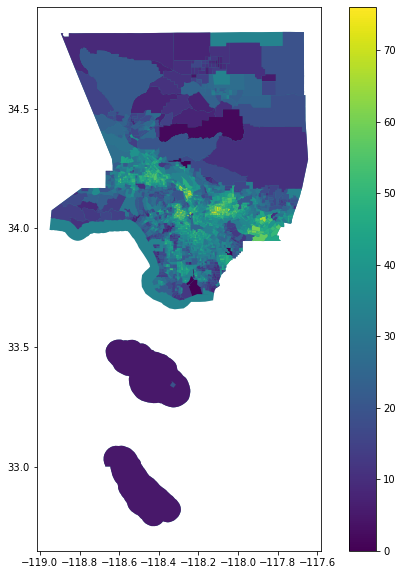

In [65]:
df.plot(figsize=(10,10),
        column='Percent Foreign Born',
        legend=True)

### Isolating Our Chinatown Walkshed

Based on a walk shed map I created in a different notebook, I use its nodes to cross reference a census tract map and identify the tracts in our walkshed. I now isoalte those tracts into its own variable

In [144]:
ChinatownStation = df[df["geoid"].isin(['14000US06037206010', 
                                       '14000US06037207103', 
                                       '14000US06037207102',
                                       '14000US06037206020']
                                      )
                     ]

In [145]:
ChinatownStation.head()

geoid                                   name  \
531  14000US06037206010  Census Tract 2060.10, Los Angeles, CA   
532  14000US06037206020  Census Tract 2060.20, Los Angeles, CA   
539  14000US06037207102  Census Tract 2071.02, Los Angeles, CA   
540  14000US06037207103  Census Tract 2071.03, Los Angeles, CA   

     Total Foreign Born  China, Hong Kong, Taiwan  \
531              2059.0                     827.0   
532              1074.0                      39.0   
539              1837.0                    1090.0   
540              1649.0                    1164.0   

     China et al Entered 2010 or later  China et al Before 2010  Cuba  \
531                              172.0                    655.0   0.0   
532                               24.0                     15.0   0.0   
539                               56.0                   1034.0   0.0   
540                              332.0                    832.0   6.0   

     Cuba Entered 2010 or later  Cuba Entered Before 2010  Dominican Republic  \
531                         0.0                       0.0                 0.0   
532                         0.0                       0.0                 8.0   
539                         0.0                       0.0                 0.0   
540                         0.0                       6.0                 0.0   

     ...  Philippines Entered Before 2010  Vietnam  \
531  ...                             12.0    187.0   
532  ...                             18.0      4.0   
539  ...                             20.0     15.0   
540  ...                             50.0    199.0   

     Vietnam Entered 2010 or later  Vietnam Entered Before 2010  \
531                           28.0                        159.0   
532                            0.0                          4.0   
539                            0.0                         15.0   
540                            9.0                        190.0   

     All Other Countries  A.O.C. Entered 2010 or later  \
531                122.0                          25.0   
532                364.0                          48.0   
539                408.0                          49.0   
540                195.0                          59.0   

     A.O.C. Entered Before 2010  \
531                        97.0   
532                       316.0   
539                       359.0   
540                       136.0   

                                              geometry  Total Population  \
531  MULTIPOLYGON (((-118.23924 34.06726, -118.2380...            4121.0   
532  MULTIPOLYGON (((-118.23787 34.05427, -118.2378...            8947.0   
539  MULTIPOLYGON (((-118.24303 34.05735, -118.2429...            2926.0   
540  MULTIPOLYGON (((-118.24557 34.06470, -118.2454...            2393.0   

     Percent Foreign Born  
531             49.963601  
532             12.004024  
539             62.781955  
540             68.909319  

[4 rows x 36 columns]

<AxesSubplot:>

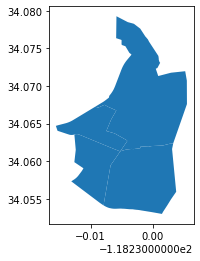

In [146]:
ChinatownStation.plot()

There's our census tracts. Let's add some statistics these census tracts. 

<AxesSubplot:>

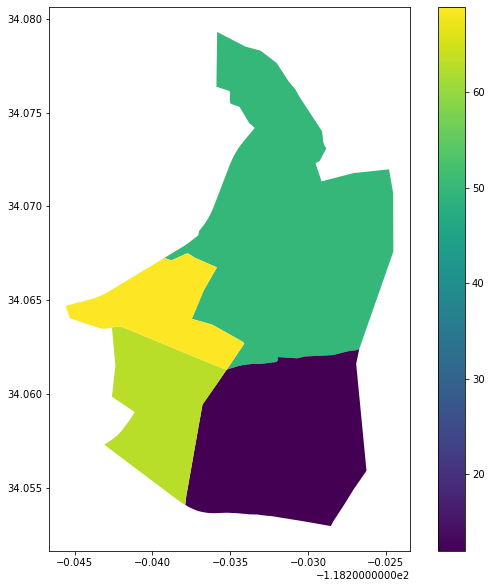

In [147]:
ChinatownStation.plot(figsize=(10,10),
        column='Percent Foreign Born',
        legend=True)

Wow, there's a census tract north of our station that has a 67% foreign born population. Let's add some map detail like titles and a basemap. 

In [148]:
### Adding a base map and map details

We first have to project our data to web mercator

In [149]:
ChinatownStation_web_mercator = ChinatownStation.to_crs(epsg=3857)

Now we can tap into adding map details and our basemap.

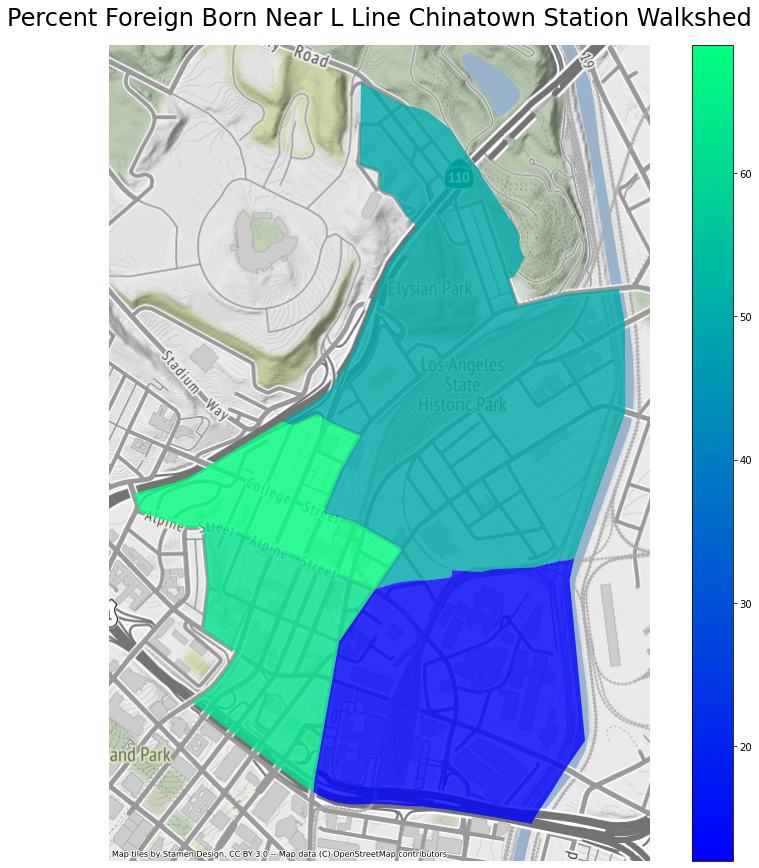

In [150]:
fig, ax = plt.subplots(figsize=(15, 15))
 
ChinatownStation_web_mercator.plot(
                    column='Percent Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

ax.axis('off')

ax.set_title('Percent Foreign Born Near L Line Chinatown Station Walkshed',fontsize=24, pad=20)

ctx.add_basemap(ax,source=ctx.providers.Stamen.Terrain)
#how can we add a legend and bins to this?

Nice! Let's layer our isochrone map with our chlorpleth map.

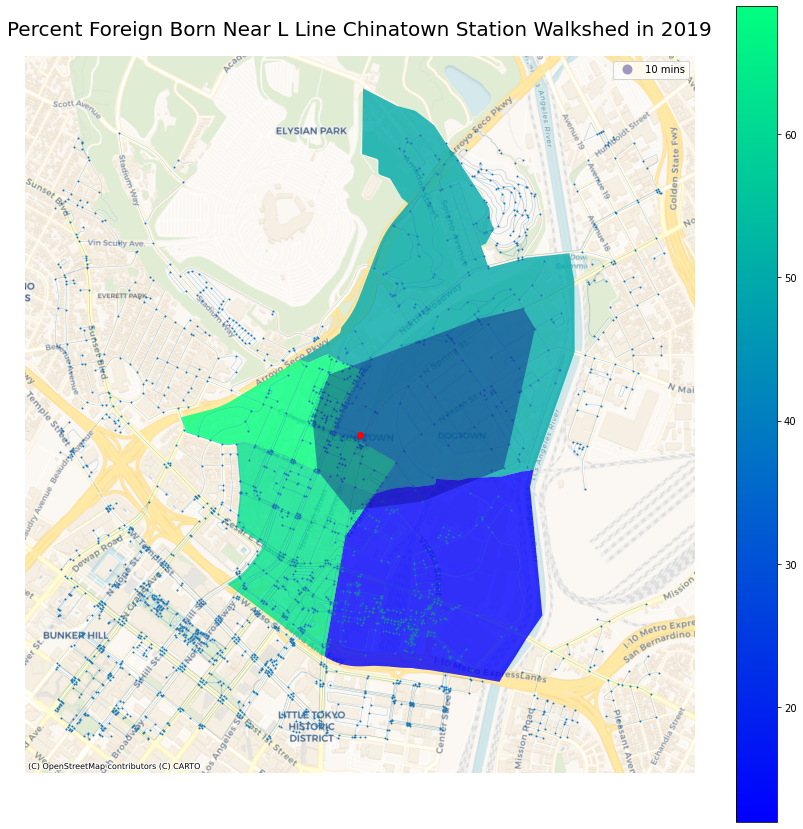

In [153]:
fig, ax = plt.subplots(figsize=(15, 15))
 
ChinatownStation_web_mercator.plot(
                    column='Percent Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[8290553634]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')

ax.set_title('Percent Foreign Born Near L Line Chinatown Station Walkshed in 2019',fontsize=20, pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

Great! As we can see there's a high percentage of foreign born residents north of the station. South of the station there's approximately only 20% foreign born. That less than the 34% county average we can see below if we scroll to the last column. This area is different than other parts of Chinatown in that it is very industrial. 

In [157]:
df.head(1)

geoid                    name  Total Foreign Born  \
0  05000US06037  Los Angeles County, CA           3430507.0   

   China, Hong Kong, Taiwan  China et al Entered 2010 or later  \
0                  288054.0                            76162.0   

   China et al Before 2010     Cuba  Cuba Entered 2010 or later  \
0                 211892.0  17332.0                      1356.0   

   Cuba Entered Before 2010  Dominican Republic  ...  \
0                   15976.0             12687.0  ...   

   Philippines Entered Before 2010  Vietnam  Vietnam Entered 2010 or later  \
0                         207873.0  98409.0                        10841.0   

   Vietnam Entered Before 2010  All Other Countries  \
0                      87568.0             989775.0   

   A.O.C. Entered 2010 or later  A.O.C. Entered Before 2010  \
0                      173834.0                    815941.0   

                                            geometry  Total Population  \
0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...        10081570.0   

   Percent Foreign Born  
0             34.027508  

[1 rows x 36 columns]

## Interactive Map of Percent Foreign Born Ethnicity in Chinatown Station Area

We are interested in creating a map that shows the precent of foreign born in each census tract in our walkshed. 

### Importing plotly

To create our interactive map, we'll use plotly.

In [158]:
# for interactive plots
import plotly.express as px

Next, we have to create new columns in our dataset that reflects the percent foreign born based on ethnicity for each census tract. 

In [160]:
df.sample(1)

geoid                                name  \
1875  14000US06037573300  Census Tract 5733, Los Angeles, CA   

      Total Foreign Born  China, Hong Kong, Taiwan  \
1875              1587.0                      21.0   

      China et al Entered 2010 or later  China et al Before 2010  Cuba  \
1875                               21.0                      0.0   0.0   

      Cuba Entered 2010 or later  Cuba Entered Before 2010  \
1875                         0.0                       0.0   

      Dominican Republic  ...  Philippines Entered Before 2010  Vietnam  \
1875                 0.0  ...                             11.0     13.0   

      Vietnam Entered 2010 or later  Vietnam Entered Before 2010  \
1875                            0.0                         13.0   

      All Other Countries  A.O.C. Entered 2010 or later  \
1875                808.0                         111.0   

      A.O.C. Entered Before 2010  \
1875                       697.0   

                                               geometry  Total Population  \
1875  MULTIPOLYGON (((-118.18067 33.79060, -118.1806...            4158.0   

      Percent Foreign Born  
1875             38.167388  

[1 rows x 36 columns]

In [159]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   geoid                              2347 non-null   object  
 1   name                               2347 non-null   object  
 2   Total Foreign Born                 2347 non-null   float64 
 3   China, Hong Kong, Taiwan           2347 non-null   float64 
 4   China et al Entered 2010 or later  2347 non-null   float64 
 5   China et al Before 2010            2347 non-null   float64 
 6   Cuba                               2347 non-null   float64 
 7   Cuba Entered 2010 or later         2347 non-null   float64 
 8   Cuba Entered Before 2010           2347 non-null   float64 
 9   Dominican Republic                 2347 non-null   float64 
 10  D.R. Entered 2010 or later         2347 non-null   float64 
 11  D.R. Entered Before 2010           

In [161]:
Per_ChinaEtAl = (df['China, Hong Kong, Taiwan']/df['Total Population'])*100
Per_Cuba = (df['Cuba']/df['Total Population'])*100
Per_Dominican = (df['Dominican Republic']/df['Total Population'])*100
Per_ElSalvador = (df['El Salvador']/df['Total Population'])*100
Per_Guatemala = (df['Guatemala']/df['Total Population'])*100
Per_India = (df['India']/df['Total Population'])*100
Per_Mexico = (df['Mexico']/df['Total Population'])*100
Per_Philippines = (df['Philippines']/df['Total Population'])*100
Per_Vietnam = (df['Vietnam']/df['Total Population'])*100
Per_AOC = (df['All Other Countries']/df['Total Population'])*100

Now we attach these new variables to our dataset so they populate as columns.

In [163]:
df['% China, et al'] = Per_ChinaEtAl
df['% Cuba'] = Per_Cuba
df['% Dominican'] = Per_Dominican
df['% El Salvador'] = Per_ElSalvador
df['% Guatemala'] = Per_Guatemala
df['% India'] = Per_India
df['% Mexico'] = Per_Mexico
df['% Philippines'] = Per_Philippines
df['% Vietnam'] = Per_Vietnam
df['% AOC'] = Per_AOC

In [164]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   geoid                              2347 non-null   object  
 1   name                               2347 non-null   object  
 2   Total Foreign Born                 2347 non-null   float64 
 3   China, Hong Kong, Taiwan           2347 non-null   float64 
 4   China et al Entered 2010 or later  2347 non-null   float64 
 5   China et al Before 2010            2347 non-null   float64 
 6   Cuba                               2347 non-null   float64 
 7   Cuba Entered 2010 or later         2347 non-null   float64 
 8   Cuba Entered Before 2010           2347 non-null   float64 
 9   Dominican Republic                 2347 non-null   float64 
 10  D.R. Entered 2010 or later         2347 non-null   float64 
 11  D.R. Entered Before 2010           

There they are! Now let's try to plot a map where the percent ethnicity of our station area census tracts can be read. 

### Creating a data subset of our new percentages

To make it a little easier on us, we move the new percentage columns we created into a new variable. 

In [169]:
df_ethnicity_per = df[['geometry', '% China, et al','% Cuba','% Dominican','% El Salvador','% Guatemala','% India', '% Mexico', '% Philippines', '% Vietnam', '% AOC']].copy()

In [170]:
df_ethnicity_per.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geometry        2347 non-null   geometry
 1   % China, et al  2328 non-null   float64 
 2   % Cuba          2328 non-null   float64 
 3   % Dominican     2328 non-null   float64 
 4   % El Salvador   2328 non-null   float64 
 5   % Guatemala     2328 non-null   float64 
 6   % India         2328 non-null   float64 
 7   % Mexico        2328 non-null   float64 
 8   % Philippines   2328 non-null   float64 
 9   % Vietnam       2328 non-null   float64 
 10  % AOC           2328 non-null   float64 
dtypes: float64(10), geometry(1)
memory usage: 284.6 KB


Our subset is complete, now I'm looking to map the census tracts without a base map. We use the scatter option on plotly. 

For our next map, we design an interactive map where clicking in each census tract will give us information about the foreign born population that lives there.  

In [173]:
# plot it
fig = px.scatter(ChinatownStation,
           x='geometry',
           y='geometry'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Percent Foreign Born by Ethnicity"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

TypeError: Object of type MultiPolygon is not JSON serializable

In [ ]:
fig = px.scatter_mapbox(arrests_mini, 
                        lat="lat", 
                        lon="lon", 
                        color="descent_cd",
                        # maybe here is where instead of "Race" we would drop the percent
                        # ethnicity for each census tract
                        labels={'descent_cd':'Race'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (December 2021)",
    title_x=0.5 # aligns title to center
)


fig.show()